In [4]:
import qiskit

In [7]:
qiskit.__qiskit_version__



{'qiskit-terra': '0.25.1', 'qiskit': '0.44.1', 'qiskit-aer': None, 'qiskit-ignis': None, 'qiskit-ibmq-provider': None, 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [9]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


TypeError: 'QuantumCircuit' object is not callable


Total count for 00 and 11 are: {'11': 486, '00': 514}


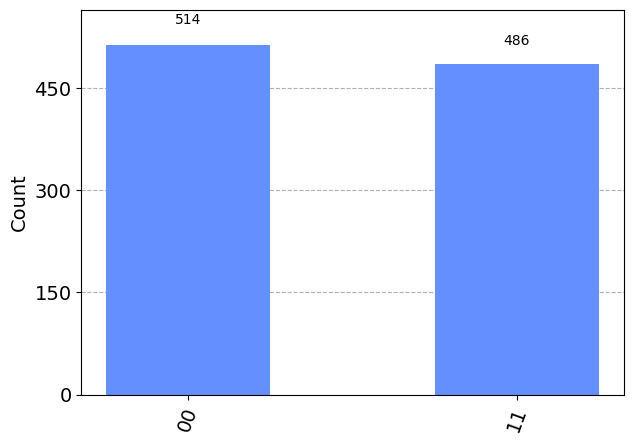

In [26]:
simulator = AerSimulator()

circuit = QuantumCircuit(2, 2)

circuit.h(0)

circuit.cx(0, 1)

circuit.measure([0, 1], [0, 1])


compiled_circuit = transpile(circuit, simulator)

job = simulator.run(compiled_circuit, shots = 1000)

result = job.result()



counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:", counts)

circuit.draw('mpl') # Drawing the circuit
plot_histogram(counts)

#  Now I want to plot a bloch vector


In [28]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

In [46]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import AerSimulator

# Create a quantum circuit with measurement gates
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()  # Include measurement gates

# Define the backend (qiskit_aer simulator)
backend = AerSimulator()

# Transpile the circuit for the chosen backend
compiled_circuit = transpile(bell, backend)

# Define the number of shots (number of times to run the circuit)
num_shots = 1024

# Execute the quantum circuit and obtain measurement outcomes
result = backend.run(compiled_circuit, shots=num_shots).result()
counts = result.get_counts()

# Print or use the measurement outcomes 'counts'
print(counts)


{'00': 521, '11': 503}


In [47]:
# # quantum circuit to make a Bell state
# bell = QuantumCircuit(2, 2)
# bell.h(0)
# bell.cx(0, 1)

# meas = QuantumCircuit(2, 2)
# meas.measure([0,1], [0,1])

# # execute the quantum circuit
# # backend = BasicAer.get_backend('qasm_simulator') # the device to run on
# backend = AerSimulator()
# circ = bell.compose(meas)
# result = backend.run(transpile(circ, backend), shots=1000).result()
# counts  = result.get_counts(circ)
# print(counts)

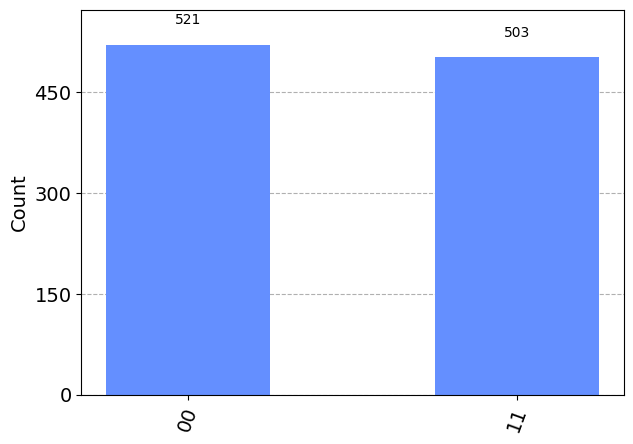

In [49]:
plot_histogram(counts)

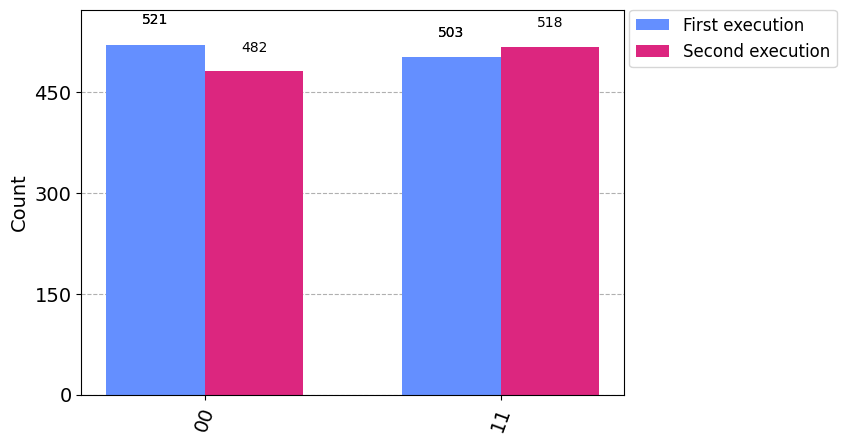

In [50]:
# Execute 2-qubit Bell state again
second_result = backend.run(transpile(circ, backend), shots=1000).result()
second_counts  = second_result.get_counts(circ)
# Plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend)

In [53]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

In [57]:
# execute the quantum circuit
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = backend.run(transpile(bell, backend)).result()
psi  = result.get_statevector(bell)

QiskitError: 'No statevector for experiment "None"'

In [58]:
plot_state_city(psi)

NameError: name 'psi' is not defined